## 1. Poisson eq'n manual

푸아송 방정식을 해결하는 과정에서 발견한 오류의 원인들을 적어놓았다. 또한, 특정 함수의 의미 등, 향후 문제 풀이 시 참고하면 좋을 내용들을 적어놓았다. (지속적으로 업데이트 할 예정)

**※주의사항※**
1. 도메인 크기가 커지면, mesh 갯수도 충분히 커져야 한다.
    - 그렇지 않으면 잘못된 계산 결과가 나옴.
2. tol값이 너무 작으면 안된다.
    - 10^(-3) 정도가 적절하다. 더 작아지면 boundary 영역을 못잡음

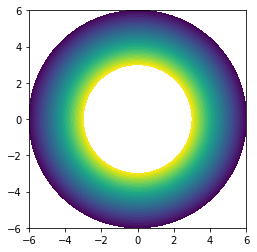

In [2]:
# from dolfin import *

# Create mesh and define function space
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

geometry_1 = Circle(Point(0, 0), 3)
geometry_2 = Circle(Point(0, 0), 6)
geometry = geometry_2 - geometry_1
mesh = generate_mesh(geometry, 100)    # 충분한 mesh 숫자가 적용돼야 올바른 계산 결과가 나타난다.
X = FunctionSpace(mesh, "Lagrange", 2)    # 함수가 적용되는 함수공간 X : mesh를 토대로 결정된다.
tol = 1E-3    # 10^(-4)부터는 바운더리 영역을 잘 잡지 못함.

epsilon_0 = 1
epsilon_e = 1

# Define boundary condition

def boundary_O(x, on_boundary):
    r=sqrt(x[0]*x[0]+x[1]*x[1])    # x[0]:x, x[1]:y 을 의미한다. (이러한 표현은 특정 함수들 내에서만 적용 됨을 유의)
    return on_boundary and r > 6-tol    # 경계를 잡을때에는 tol과 부등호를 활용, 미세 영역을 지정해줘야 한다.
                                        # r==6과 같은 조건 설정은 불가능.

bc_O = DirichletBC(X, 0, boundary_O)    # DirichletBC(함수공간, 경계 영역의 조건, 경계 영역)

def boundary_I(x, on_boundary):
    r=sqrt(x[0]*x[0]+x[1]*x[1])
    return on_boundary and r < 3+tol

bc_I = DirichletBC(X, 15, boundary_I)

bcs=[bc_I, bc_O]    # boundary 조건이 다수인 경우 []를 활용한다.

# Define variational problem
V = TrialFunction(X)
v = TestFunction(X)
rho = Expression("0.5", degree=2)
a = dot(epsilon_0*epsilon_e*grad(V), grad(v))*dx
L = rho*v*dx

# Compute solution
V = Function(X)
solve(a == L, V, bcs)

# Save solution in VTK format
file = File("electric_potential.pvd")
file << V

# Plot solution
import matplotlib.pyplot as plt
plot(V)
plt.show()

## [오류에 대한 예시]
### 주의사항 1번에 해당하는 오류 예시
- mesh의 갯수를 50으로 감소시킨 경우, 잘못된 결과값이 도출됨.

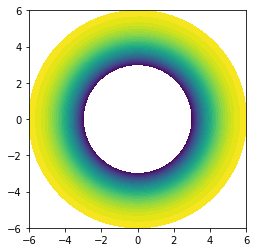

In [4]:
# from dolfin import *

# Create mesh and define function space
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

geometry_1 = Circle(Point(0, 0), 3)
geometry_2 = Circle(Point(0, 0), 6)
geometry = geometry_2 - geometry_1
mesh = generate_mesh(geometry, 50)       # mesh 갯수 : 50개로 변경
X = FunctionSpace(mesh, "Lagrange", 2) 
tol = 1E-3    

epsilon_0 = 1
epsilon_e = 1

# Define boundary condition

def boundary_O(x, on_boundary):
    r=sqrt(x[0]*x[0]+x[1]*x[1])    
    return on_boundary and r > 6-tol    

bc_O = DirichletBC(X, 0, boundary_O)    

def boundary_I(x, on_boundary):
    r=sqrt(x[0]*x[0]+x[1]*x[1])
    return on_boundary and r < 3+tol

bc_I = DirichletBC(X, 15, boundary_I)

bcs=[bc_I, bc_O]   

# Define variational problem
V = TrialFunction(X)
v = TestFunction(X)
rho = Expression("0.5", degree=2)
a = dot(epsilon_0*epsilon_e*grad(V), grad(v))*dx
L = rho*v*dx

# Compute solution
V = Function(X)
solve(a == L, V, bcs)

# Save solution in VTK format
file = File("electric_potential.pvd")
file << V

# Plot solution
import matplotlib.pyplot as plt
plot(V)
plt.show()

### 주의사항 2번에 해당하는 오류 예시
- tol값이 10^(-4)로 작아진 경우, 경계를 올바르게 잡지 못해 잘못된 결과값이 도출됨.

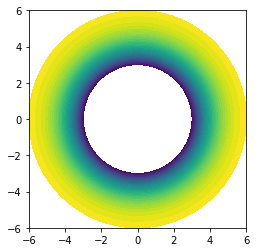

In [5]:
# from dolfin import *

# Create mesh and define function space
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt

geometry_1 = Circle(Point(0, 0), 3)
geometry_2 = Circle(Point(0, 0), 6)
geometry = geometry_2 - geometry_1
mesh = generate_mesh(geometry, 100)    
X = FunctionSpace(mesh, "Lagrange", 2) 
tol = 1E-4    # tol 값을 낮춤

epsilon_0 = 1
epsilon_e = 1

# Define boundary condition

def boundary_O(x, on_boundary):
    r=sqrt(x[0]*x[0]+x[1]*x[1])    
    return on_boundary and r > 6-tol    

bc_O = DirichletBC(X, 0, boundary_O)    

def boundary_I(x, on_boundary):
    r=sqrt(x[0]*x[0]+x[1]*x[1])
    return on_boundary and r < 3+tol

bc_I = DirichletBC(X, 15, boundary_I)

bcs=[bc_I, bc_O]   

# Define variational problem
V = TrialFunction(X)
v = TestFunction(X)
rho = Expression("0.5", degree=2)
a = dot(epsilon_0*epsilon_e*grad(V), grad(v))*dx
L = rho*v*dx

# Compute solution
V = Function(X)
solve(a == L, V, bcs)

# Save solution in VTK format
file = File("electric_potential.pvd")
file << V

# Plot solution
import matplotlib.pyplot as plt
plot(V)
plt.show()